## Data : US Police Shootings from 2015- Sep 2022
 * 미국에서 2015년부터 2022년까지 경찰 총격 사건 데이터
 * Data From : https://www.kaggle.com/datasets/ramjasmaurya/us-police-shootings-from-20152022

### 1. 데이터 불러오기

* 기본 패키지 불러오기

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import warnings
warnings.filterwarnings('ignore')

* CSV 파일 불러오기

In [2]:
df = pd.read_csv('./US Police shootings in from 2015-22.csv')

* 데이터 살펴보기

In [3]:
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,1,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
1,2,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
2,3,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
3,4,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
4,5,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True


<칼럼 설명>
* id : 고유번호
* name : 총격 피해자 이름
* date : 날짜
* manner_of_death : 사망방식 유형
* armed : 무장여부
* age : 나이
* gender : 성별
* race : 인종
* city : 도시
* state : 주
* signs_of_mental_illness : 정신질환 여부
* threat_level : 위협수준
* flee : 도주여부
* body_camera : 바디캠 착용 여부
* longitude : 경도
* latitude : 위도
* is_geocoding_exact : 정확한 위치 여부

### 2. 데이터 전처리

* 컬럼별 결측치 확인

In [4]:
df.isnull().sum()

id                            0
name                        417
date                          0
manner_of_death               0
armed                       209
age                         482
gender                       20
race                       1460
city                          0
state                         0
signs_of_mental_illness       0
threat_level                  0
flee                        875
body_camera                   0
longitude                   837
latitude                    837
is_geocoding_exact            0
dtype: int64

결측치를 제거할 이유가 없음으로 지금은 그대로 유지한다.

* 연령을 구간별로 나눈다.

In [5]:
df['age_bin'] = pd.cut(df['age'],bins = [0,19,29,39,49,59,69,100],labels =['0-19','20-29','30-39','40-49','50-59','60-69','70+'] )
df[['age_bin']].head()

,age_bin
0,50-59
1,40-49
2,20-29
3,30-39
4,30-39


### 3. EDA

#### 3-1 Age

In [6]:
df_age_bin = df['age_bin'].value_counts().reset_index(name = 'counts')
df_age_bin.head()

,index,counts
0,30-39,2272
1,20-29,1946
2,40-49,1369
3,50-59,839
4,0-19,361


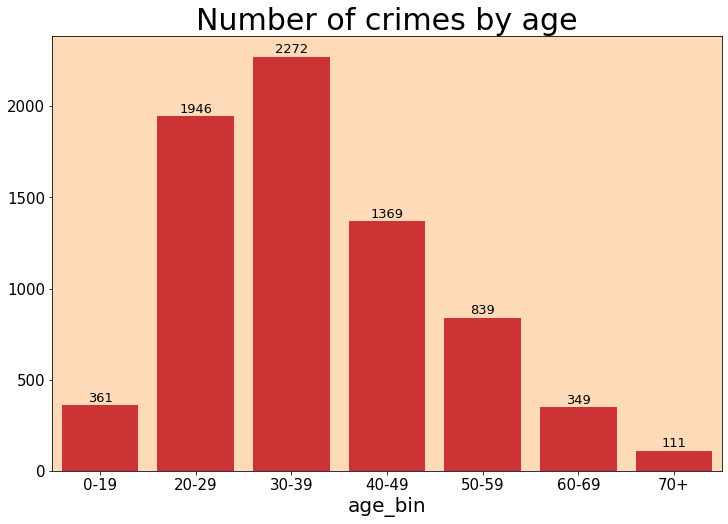

In [132]:
plt.figure(figsize = (12,8))
ax = sns.barplot(data = df_age_bin, x = 'index', y = 'counts',color=  '#e41a1c')
ax.patch.set_facecolor('#FFDAB9')
plt.ylabel('')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 20, int(height), ha = 'center', size = 13)
plt.xticks(size = 15)    
plt.yticks(size = 15)
plt.title('Number of crimes by age',fontsize = 30)
plt.xlabel('age_bin',fontsize = 20);

 - 전체 범죄건수 중에 30대와 20대 비율이 다른 나이대에 비해 높다.  
 - 미성년자의 범죄도 전체 범죄의 4.68%의 비율을 차지하여 교육과정에서   
 범죄예방 교육을 강화한다.
    

#### 3-1-1 성별에 따른 나이 분포

In [8]:
df_age_gender = df.groupby(['age_bin'])['gender'].value_counts().reset_index(name = 'counts')
df_age_gender

,age_bin,gender,counts
0,0-19,M,343
1,0-19,F,16
2,20-29,M,1859
3,20-29,F,85
4,30-39,M,2168
5,30-39,F,103
6,40-49,M,1301
7,40-49,F,68
8,50-59,M,795
9,50-59,F,44


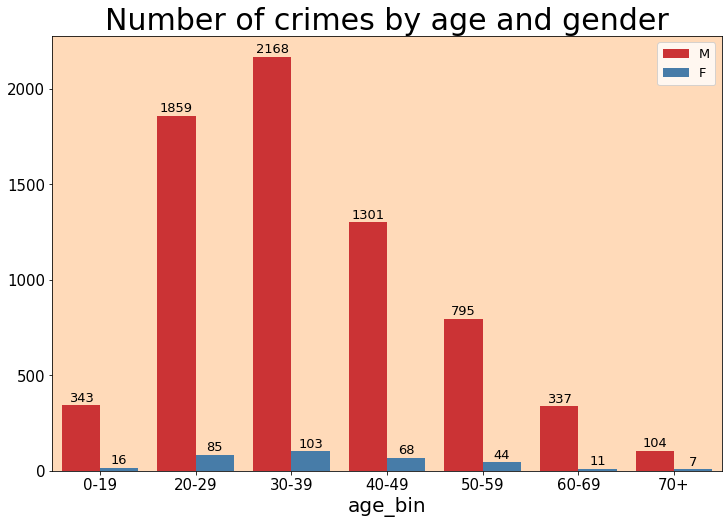

In [133]:
plt.figure(figsize = (12,8))
ax = sns.barplot(data =df_age_gender, x = 'age_bin', y = 'counts',hue = 'gender',palette='Set1')
ax.patch.set_facecolor('#FFDAB9')
plt.ylabel('')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 20, int(height), ha = 'center', size = 13)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel('age_bin',fontsize = 20)
plt.title('Number of crimes by age and gender',fontsize = 30)
plt.legend(fontsize = 13);

- 여성의 범죄건수도 남성의 범죄건수과 마찬가지로 30대와 20대의 범죄 비율이 가장 높다.
- 미성년자인 여성의 범죄가 전체 여성범죄 건수의 4.5% 남자인경우는 4.6%임으로  
미성년자의 범죄 비율은 성별과는 상관관계가 없다

#### 3-2 Gender

In [10]:
df['gender'].value_counts().reset_index(name = 'count')

,index,count
0,M,7361
1,F,348


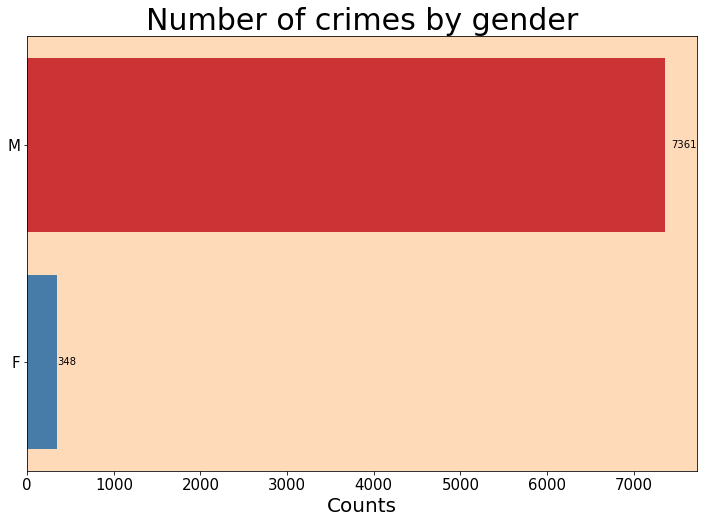

In [134]:
plt.figure(figsize = (12,8))
ax = sns.barplot(data = df['gender'].value_counts().reset_index(name = 'count'), x = 'count', y = 'index',palette='Set1')
ax.patch.set_facecolor('#FFDAB9')
for p in ax.patches:
    x, y, width, height = p.get_bbox().bounds
    ax.text(width*1.01, y+height/2, int(width), va='center',size = 10)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel('Counts',fontsize = 20)
plt.title('Number of crimes by gender',fontsize = 30)
plt.ylabel('');

 - 전체 범죄건수중 범인의 비율이 남성이 95.4%를 차지하고 여성이 나머지 4.6%를 차지한다.

#### 3-3 Race

* 인종 종류 : Asian, White, Hispanic, Black, Other

In [12]:
df['race'].value_counts().reset_index(name = 'counts')

,index,counts
0,W,3198
1,B,1686
2,H,1128
3,A,113
4,N,97
5,O,47


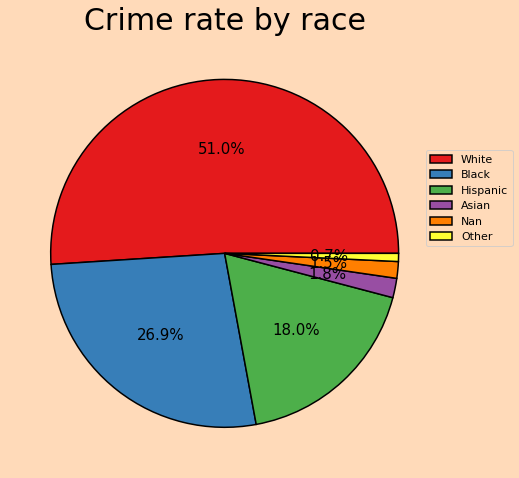

In [149]:
color = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00', '#ffff33', '#a65628', '#f781bf', '#999999']

wedgeprops = {
    'edgecolor': 'black',
    'linestyle': '-',
    'linewidth': 1.5
}
label = ['White','Black','Hispanic','Asian','Nan','Other']
plt.figure(figsize=(12,8),facecolor='#FFDAB9')
ax = plt.pie(df['race'].value_counts(),autopct='%0.1f%%',shadow = False,colors=color, 
       wedgeprops=wedgeprops, textprops = {'fontsize' : 15})
plt.title('Crime rate by race',fontsize = 30)
plt.legend(labels = label,fontsize= 11,bbox_to_anchor=(0.95,0.75),facecolor='#FFDAB9');

 - 미국의 백인 인구가 60%를 차지하고 있기때문에 사건 피해자수의 전체 51.01%를 차지하고  
 그 다음으로 흑인과 아시아인이 범죄 비율이 높다.  
 - 우리가 평소 미디어에서 흑인이 주로 범죄를 저지르기 때문에 흑인이 범죄비율이 높을것이라는 편견을  
 가지고 있는데 하지만 실제는 흑인보다는 백인의 범죄 비율이 약2배 가까이 된다.

#### 3-4 City

In [14]:
df['city'].value_counts().reset_index(name = 'counts').head(8)

,index,counts
0,Los Angeles,128
1,Phoenix,101
2,Houston,87
3,San Antonio,66
4,Las Vegas,63
5,Albuquerque,54
6,Chicago,49
7,Columbus,48


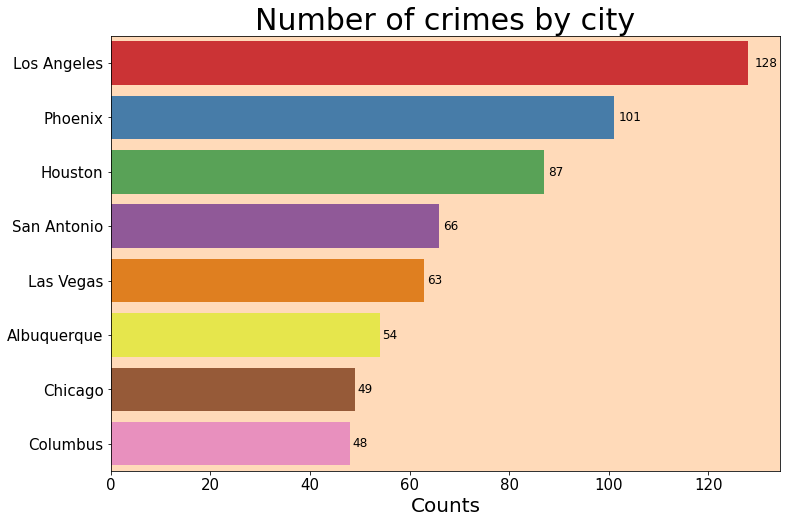

In [136]:
plt.figure(figsize = (12,8))
ax = sns.barplot(data = df['city'].value_counts().reset_index(name = 'counts').head(8), x = 'counts', y = 'index',palette='Set1')
ax.patch.set_facecolor('#FFDAB9')
for p in ax.patches:
    x, y, width, height = p.get_bbox().bounds
    ax.text(width*1.01, y+height/2, int(width), va='center',size = 12)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel('Counts',fontsize = 20)
plt.title('Number of crimes by city',fontsize = 30)
plt.ylabel('');

 - 범죄 발생지역 중 LA, Phoenix, Las Vegas 등 서부지역에서 발생하는 범죄건수가   
 동족지역보다 높다.

#### 3-5 Signs_of_mental_illness

In [150]:
df_illness = df['signs_of_mental_illness'].value_counts().reset_index(name = 'counts')
df_illness

,index,counts
0,False,6089
1,True,1640


In [151]:
df_illness.loc[0,'index'] = 'Normal'
df_illness.loc[1,'index'] = 'Unnormal'

In [152]:
df_illness

,index,counts
0,Normal,6089
1,Unnormal,1640


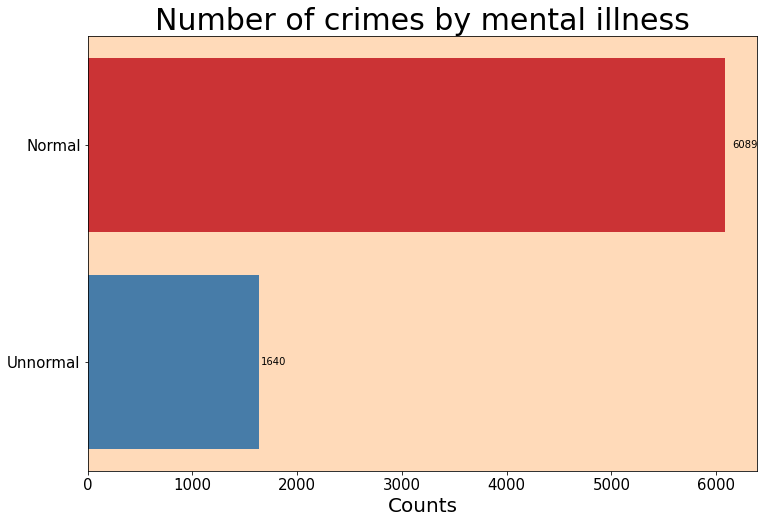

In [153]:
plt.figure(figsize = (12,8))
ax = sns.barplot(data = df_illness , x = 'counts', y = 'index',palette='Set1')
ax.patch.set_facecolor('#FFDAB9')
for p in ax.patches:
    x, y, width, height = p.get_bbox().bounds
    ax.text(width*1.01, y+height/2, int(width), va='center',size = 10)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.ylabel('')
plt.title('Number of crimes by mental illness',fontsize = 30)
plt.xlabel('Counts',fontsize = 20);

 - 전체 범죄 중 정신질환을 가진 피해자는 1640명으로 21.4%를 차지하고  
 피해자에 대한 보복범죄일 가능성이 크다.
 - 평소에 정신질환을 가진 사람들이 범죄발생 비율이 높다는 선입견을 가지고 있지만  
 실제 데이터로 통계를 내보면 정신질환을 가지고 있지않은 일반인들의 비율이 상대적으로 높다.

#### 3-5-1 성별에 따른 정신질환 여부

In [20]:
df_g_illness = df.groupby(['gender'])['signs_of_mental_illness'].value_counts().reset_index(name = 'counts').sort_values(by = 'gender',ascending = False)
df_g_illness

,gender,signs_of_mental_illness,counts
2,M,False,5835
3,M,True,1526
0,F,False,235
1,F,True,113


In [154]:
df_g_illness.loc[0,'signs_of_mental_illness'] = 'Normal'
df_g_illness.loc[1,'signs_of_mental_illness'] = 'Unnormal'
df_g_illness.loc[2,'signs_of_mental_illness'] = 'Normal'
df_g_illness.loc[3,'signs_of_mental_illness'] = 'Unnormal'
df_g_illness

,gender,signs_of_mental_illness,counts
2,M,Normal,5835
3,M,Unnormal,1526
0,F,Normal,235
1,F,Unnormal,113


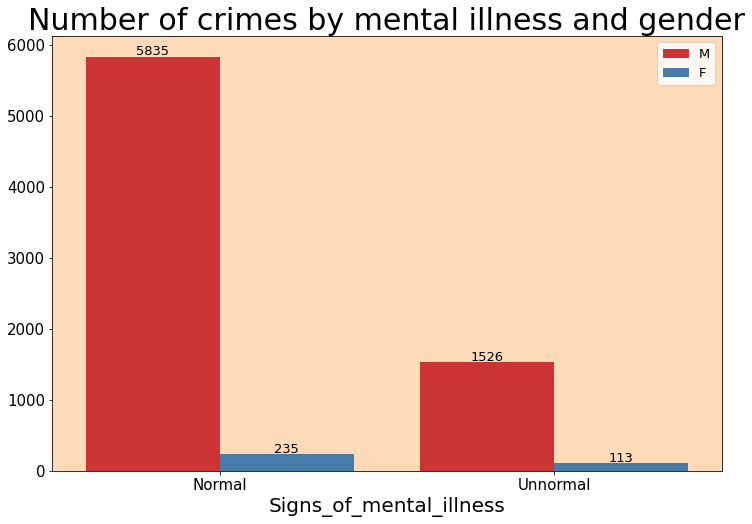

In [155]:
plt.figure(figsize = (12,8))
ax = sns.barplot(data =df_g_illness, x = 'signs_of_mental_illness', y = 'counts',hue = 'gender',palette='Set1')
ax.patch.set_facecolor('#FFDAB9')
plt.ylabel('')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 20, int(height), ha = 'center', size = 13)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel('Signs_of_mental_illness',fontsize = 20)
plt.title('Number of crimes by mental illness and gender',fontsize = 30)
plt.legend(fontsize = 13);

 - 정신질환을 가진 범인 중 남성의 비율이 93%이고 여성은 7%이다.
 - 남성 범죄자중 정신질환을 가진 비율이 20%이고,   
 여성은 여성범죄자중 32%가 정신질환자임으로  
 여성인 경우 정신 질환을 가지고 있으면 범죄발생률이 높다.


#### 3-5 Flee

In [23]:
df['flee'].value_counts().reset_index(name = 'counts')

,index,counts
0,Not fleeing,4336
1,Car,1249
2,Foot,982
3,Other,287


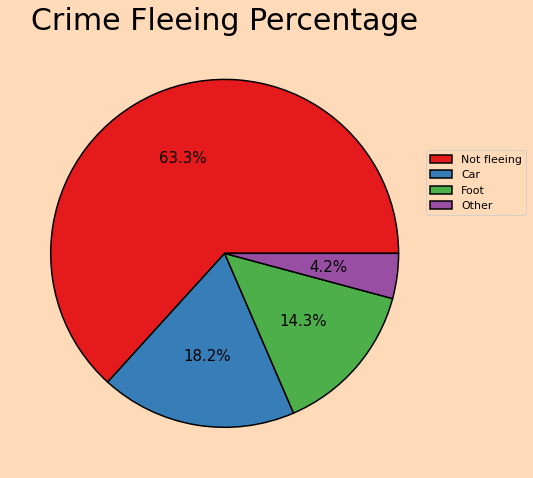

In [146]:
color = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00', '#ffff33', '#a65628', '#f781bf', '#999999']

wedgeprops = {
    'edgecolor': 'black',
    'linestyle': '-',
    'linewidth': 1.5
}
plt.figure(figsize=(12,8),facecolor='#FFDAB9')
ax = plt.pie(df['flee'].value_counts(),autopct='%0.1f%%',shadow = False,colors=color, 
       wedgeprops=wedgeprops, textprops = {'fontsize' : 15});
plt.title('Crime Fleeing Percentage',fontsize = 30)
plt.legend(labels = df['flee'].unique(),fontsize= 11,bbox_to_anchor=(0.95,0.75),facecolor='#FFDAB9');

 - 전체 범죄건수중 피해자가 현장에서 붙잡히는 과정중 사살당한 비율이 63.3%으로  
나머지 범인은 도보나 차량으로 도주하였으나 도주 과정중에서 사살되었다.

#### 3-6 Armed

In [25]:
df['armed'].value_counts().head(8).reset_index(name = 'counts')

,index,counts
0,gun,4407
1,knife,1108
2,unarmed,456
3,undetermined,313
4,vehicle,276
5,toy weapon,245
6,unknown weapon,119
7,machete,61


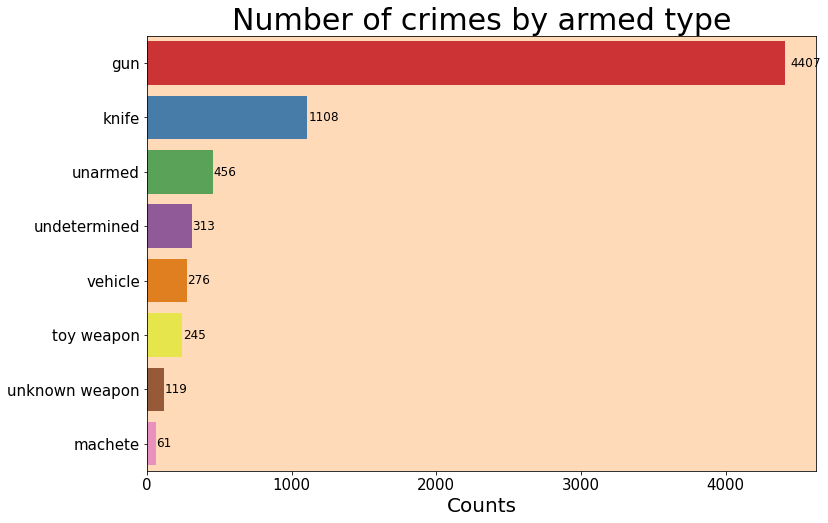

In [142]:
plt.figure(figsize = (12,8))
ax = sns.barplot(data = df['armed'].value_counts().head(8).reset_index(name = 'counts'), x = 'counts', y = 'index',palette='Set1')
ax.patch.set_facecolor('#FFDAB9')
for p in ax.patches:
    x, y, width, height = p.get_bbox().bounds
    ax.text(width*1.01, y+height/2, int(width), va='center',size = 12)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel('Counts',fontsize = 20)
plt.title('Number of crimes by armed type',fontsize = 30)
plt.ylabel('');

 - 미국은 개인 총기소유가 허락되는 나라인만큼 전체 범죄 중 총을 무장한 범죄가  
 4407건으로 전체 범죄중 57.1%를 차지한다.  
 - 앞으로도 전체 범죄 중 총을 부장한 범죄의 비율이 증가할 경우 미국에서   
 특별한 조치가 필요하다.

#### 3-7 Threat_level

In [27]:
df['threat_level'].value_counts().reset_index(name= 'counts')

,index,counts
0,attack,4875
1,other,2552
2,undetermined,302


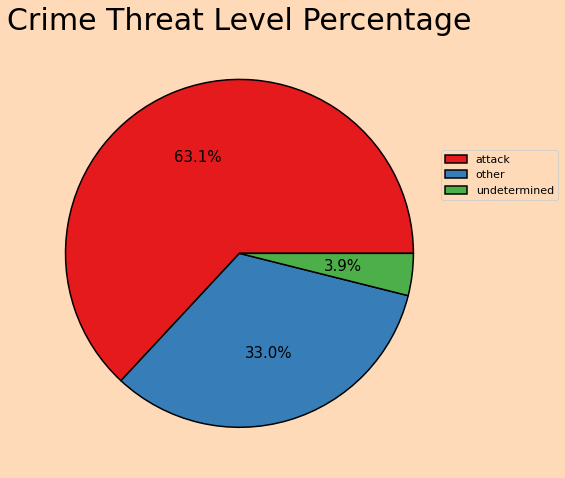

In [147]:
color = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00', '#ffff33', '#a65628', '#f781bf', '#999999']

wedgeprops = {
    'edgecolor': 'black',
    'linestyle': '-',
    'linewidth': 1.5
}
plt.figure(figsize=(12,8),facecolor='#FFDAB9')
ax = plt.pie(df['threat_level'].value_counts(),autopct='%0.1f%%',shadow = False,colors=color, 
       wedgeprops=wedgeprops, textprops = {'fontsize' : 15});
plt.legend(labels = df['threat_level'].unique(),fontsize= 11,bbox_to_anchor=(0.95,0.75),facecolor='#FFDAB9')
plt.title('Crime Threat Level Percentage',fontsize = 30);

 - 전체 범행중 63.1%가 중범죄이상으로 판단되어   
범행 가해자에 대한 공격이 이루어졌다.
 - 나머지 범죄는 경범죄 수준으로 범인에 대한 사살이 아닌  
 제압같은 명령이 하달되었다.

### 4. 월별 범죄 발생건수  예측

#### 4-1 Prophet모델을 이용하여 12개월 이후까지의 범죄 발생건수를 예측

 - 기존에 데이터의 변형을 막기 위해 데이터를 복사해서 예측만을  
 위한 데이터 셋을 준비한다.

In [29]:
ts = df.copy()

* 월별예측을 하기위해 date 컬럼을 변경하고  
2022년 9월 데이터는 전부 수집되어있지 않기에 삭제하고 예측한다.

In [30]:
ts['date'] = ts['date'].str[:7]

In [31]:
ts = ts['date'].value_counts(sort= False).drop('2022-09',axis = 0).reset_index(name = 'counts')

In [32]:
ts.columns = ['ds','y']

In [33]:
ts['ds'] = pd.to_datetime(ts['ds'])
ts.head()

,ds,y
0,2015-01-01,76
1,2015-02-01,77
2,2015-03-01,92
3,2015-04-01,84
4,2015-05-01,71


 - Prophet 모델의 패키지를 불러온다.

In [34]:
from prophet import Prophet

In [35]:
model = Prophet()
model.fit(ts)

19:15:52 - cmdstanpy - INFO - Chain [1] start processing
19:15:54 - cmdstanpy - INFO - Chain [1] done processing


  - Prophet을 통해 데이터셋 이후 12개월의 범죄건수를 예측한다.

In [36]:
future = model.make_future_dataframe(periods = 12,freq = 'MS')
forecast = model.predict(future)

In [37]:
forecast[['ds','yhat']].tail()

,ds,yhat
99,2023-04-01,89.955634
100,2023-05-01,80.007914
101,2023-06-01,84.431754
102,2023-07-01,98.222354
103,2023-08-01,87.337515


In [38]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
99,2023-04-01,84.850794,79.517843,100.293101,84.850748,84.850836,5.104840,5.104840,5.104840,5.104840,5.104840,5.104840,0.0,0.0,0.0,89.955634
100,2023-05-01,84.926789,68.383765,90.854213,84.926734,84.926841,-4.918875,-4.918875,-4.918875,-4.918875,-4.918875,-4.918875,0.0,0.0,0.0,80.007914
101,2023-06-01,85.005318,72.428221,94.751601,85.005253,85.005376,-0.573564,-0.573564,-0.573564,-0.573564,-0.573564,-0.573564,0.0,0.0,0.0,84.431754
102,2023-07-01,85.081313,86.803187,109.286605,85.081238,85.081380,13.141042,13.141042,13.141042,13.141042,13.141042,13.141042,0.0,0.0,0.0,98.222354
103,2023-08-01,85.159841,76.974541,99.123640,85.159755,85.159917,2.177673,2.177673,2.177673,2.177673,2.177673,2.177673,0.0,0.0,0.0,87.337515


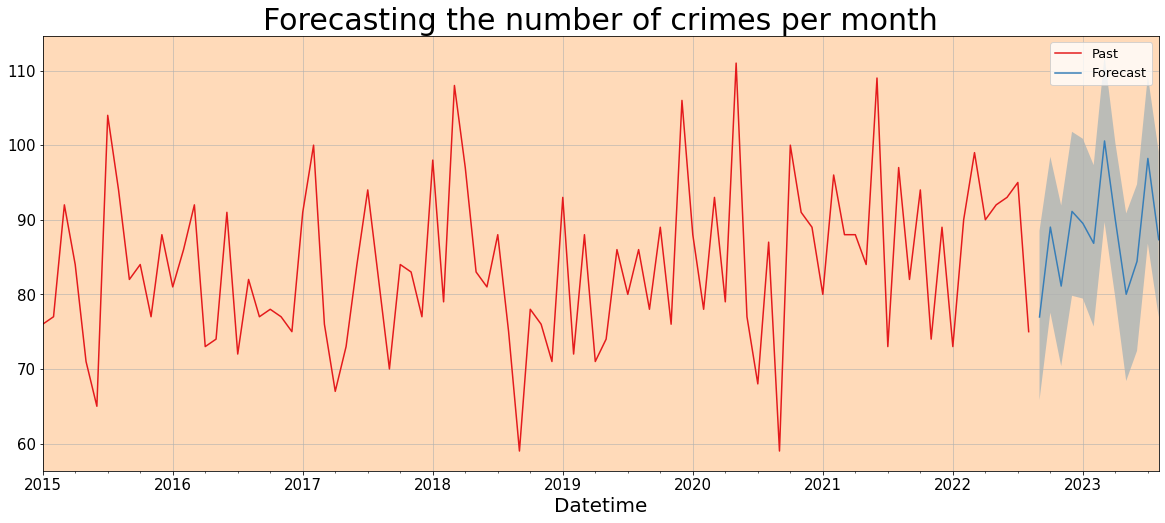

In [127]:
ax = ts.plot(x = 'ds',y = 'y',figsize = (20,8),color = '#e41a1c')
ax.patch.set_facecolor('#FFDAB9')
forecast.iloc[92:].plot(x = 'ds', y  ='yhat',ax = ax,color = '#377eb8')
plt.fill_between(forecast['ds'].iloc[92:].values,forecast.iloc[92:]['yhat_lower'],forecast.iloc[92:]['yhat_upper'],alpha = 0.3)
plt.xlabel('Datetime',fontsize = 20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(alpha = 0.7)
plt.title('Forecasting the number of crimes per month', fontsize = 30)
plt.legend(labels = ['Past','Forecast'],fontsize = 13);

 - 여태까지의 범죄가 줄어들거나 많아지지 않고 불규칙적으로 변화하여   
 앞으로 12개월의 범죄도 불규칙적으로 발생할 확률이크고 그래프에서 예측한 그래프의 범위는  
 신뢰구간이다.